In [37]:
!pip install bs4
!pip install requests
!pip install pandas
!pip install matplotlib

from bs4 import BeautifulSoup
import requests
import pandas as pd

Product_name=[]
Prices=[]
Description=[]
Reviews=[]

for i in range(2,50):
    url="https://www.flipkart.com/search?q=all%20mobiles&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off"+str(i)
    r=requests.get(url)
    soup=BeautifulSoup(r.text, "lxml")
    box=soup.find("div",class_="DOjaWF gdgoEp")
    #print(soup)
    
   # np=soup.find("a",class_="_9QVEpD").get("href")
   # cnp="https://www.flipkart.com"+np
   # print(cnp)
    
   # url=cnp
   # r=requests.get(url)
    soup=BeautifulSoup(r.text,"lxml")

    names=box.find_all("div",class_="KzDlHZ")

    for i in names:
        name=i.text
        Product_name.append(name)

    #print(Product_name)

    prices=box.find_all("div",class_="Nx9bqj _4b5DiR")

    for i in prices:
        name=i.text
        Prices.append(name)
    #print(Prices)

    desc=box.find_all("ul",class_="G4BRas")

    for i in desc:
        name=i.text
        Description.append(name)

    #print(Description)

    reviews=box.find_all("div",class_="XQDdHH")

    for i in reviews:
        name=i.text
        Reviews.append(name)

#print(Reviews)

df=pd.DataFrame({"Product Name":Product_name,"Prices":Prices,"Description":Description,"Reviews":Reviews})

print(df)

df.to_csv("C:/Users/aryan/Downloads/flipkart_Mobiles_under_50000.csv")



ValueError: All arrays must be of the same length

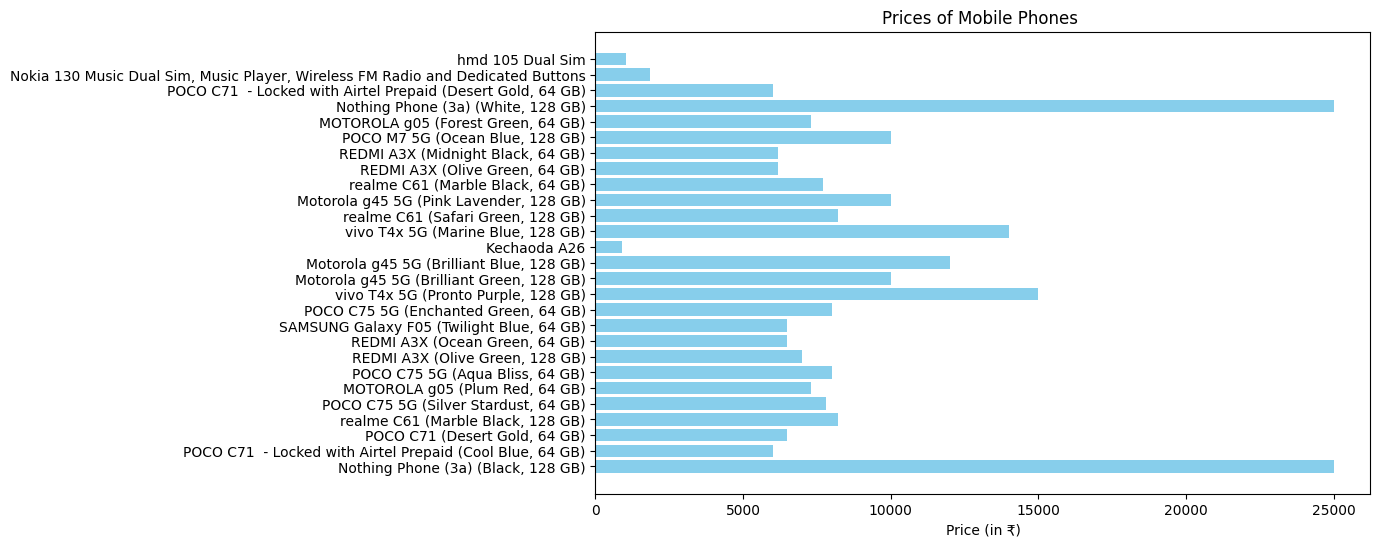

TypeError: 'float' object is not iterable

In [9]:
import matplotlib.pyplot as plt

# Convert prices to numeric values for plotting
df['Prices'] = df['Prices'].replace({'₹': '', ',': ''}, regex=True).astype(float)

plt.figure(figsize=(10, 6))
plt.barh(df['Product Name'], df['Prices'], color='skyblue')
plt.xlabel('Price (in ₹)')
plt.title('Prices of Mobile Phones ')
plt.show()

# Price Range Categorization
def categorize_price(price):
    for i in price:
        if price > 10000:
            return 'Under 10,000'
        elif price < 20000:
            return '10,000 - 20,000'
        elif price < 30000:
            return '20,000 - 30,000'
        elif price < 40000:
            return '30,000 - 40,000'
        elif price < 50000:
            return '40,000 - 50,000'
        elif price < 60000:
            return '50,000 - 60,000'
        elif price < 70000:
            return '60,000 - 70,000'
        elif price < 80000:
            return '70,000 - 80,000'
        elif price < 90000:
            return '90,000 - 100,000'
        elif price < 100000:
            return '100,000 - 110,000'
        elif price < 110000:
            return '110,000 - 120,000'
        elif price < 120000:
            return '120,000 - 130,000'
        elif price < 130000:
            return '130,000 - 140,000'
        elif price < 140000:
            return '140,000 - 150,000'
        elif price < 150000:
            return '160,000 - 170,000'
    else:
        return 'Above 1,80,000'

df['Price Category'] = df['Prices'].replace({'₹': '', ',': ''}, regex=True).astype(float).apply(categorize_price)

# Export to Excel
df.to_excel("C:/Users/aryan/Downloads/flipkart_Mobiles_under_50000.xlsx", index=False)

# Export to JSON
df.to_json("C:/Users/aryan/Downloads/flipkart_Mobiles_under_50000.json", orient='records', lines=True)     